In [1]:
import pandas as pd 

df = pd.read_csv(r"c:\work\gapminder.tsv", sep="\t")


In [2]:
df.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [3]:
#형식 확인 
type(df)

pandas.core.frame.DataFrame

In [4]:
df.shape

(1704, 6)

In [5]:
#컬럼 이름 나열 
df.columns

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')

In [8]:
#열단위로 추출 
country_df = df["country"]
type(country_df)
country_df.head()

0    Afghanistan
1    Afghanistan
2    Afghanistan
3    Afghanistan
4    Afghanistan
Name: country, dtype: object

In [ ]:
country_df.head()

In [ ]:
#리스트에 열 이름을 전달하면 여러 개의 열을 추출할 수 있다.
subset = df[["country","continent","year"]]
type(subset)
# subset.tail(7)

pandas.core.frame.DataFrame

In [13]:
subset.head()

,country,continent,year
0,Afghanistan,Asia,1952
1,Afghanistan,Asia,1957
2,Afghanistan,Asia,1962
3,Afghanistan,Asia,1967
4,Afghanistan,Asia,1972


In [19]:
#loc속성으로 행 데이터 추출하기
df.loc[2]

country      Afghanistan
continent           Asia
year                1962
lifeExp           31.997
pop             10267083
gdpPercap      853.10071
Name: 2, dtype: object

In [16]:
df.loc[99]

country      Bangladesh
continent          Asia
year               1967
lifeExp          43.453
pop            62821884
gdpPercap    721.186086
Name: 99, dtype: object

In [20]:
#인덱스에 없는 값을 사용하면 오류가 발생한다.
# df.loc[-3]
df.iloc[-1]

country        Zimbabwe
continent        Africa
year               2007
lifeExp          43.487
pop            12311143
gdpPercap    469.709298
Name: 1703, dtype: object

In [21]:
#인덱스가 1, 100, 200을 한번에 추출하려면 리스트에 원하는 인덱스를 담아 전달하면 된다.
df.loc[[1,100,200]]

,country,continent,year,lifeExp,pop,gdpPercap
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
100,Bangladesh,Asia,1972,45.252,70759295,630.233627
200,Burkina Faso,Africa,1992,50.260,8878303,931.752773


In [22]:
#이번에는 iloc속성으로 행 데이터를 추출한다. loc속성은 데이터프레임의 인덱스를 사용하여 
#데이터를 추출했지만 iloc속성은 데이터 순서를 의미하는 행 번호를 사용하여 
#데이터를 추출한다. 
#지금은 인덱스와 행 번호가 동일하여 동일한 결과값이 출력된다. 
df.iloc[1]

country      Afghanistan
continent           Asia
year                1957
lifeExp           30.332
pop              9240934
gdpPercap      820.85303
Name: 1, dtype: object

In [23]:
df.iloc[100]

country      Bangladesh
continent          Asia
year               1972
lifeExp          45.252
pop            70759295
gdpPercap    630.233627
Name: 100, dtype: object

In [24]:
#iloc속성은 음수를 사용해도 데이터를 추출할 수 있다. 
df.iloc[-1]

country        Zimbabwe
continent        Africa
year               2007
lifeExp          43.487
pop            12311143
gdpPercap    469.709298
Name: 1703, dtype: object

In [25]:
# iloc속성도 여러 데이터를 한번에 추출할 수 있다.
df.iloc[[1,100,200]]

,country,continent,year,lifeExp,pop,gdpPercap
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
100,Bangladesh,Asia,1972,45.252,70759295,630.233627
200,Burkina Faso,Africa,1992,50.260,8878303,931.752773


In [30]:
#슬라이싱 구문으로 데이터 추출하기 
#다음은 모든 행(:)의 데이터에 대해 year, pop열을 추출하는 방법입니다. 
# subset = df.loc[:, ["year","pop"]]
subset = df.loc[0:2, ["year","pop"]]
subset.head()

,year,pop
0,1952,8425333
1,1957,9240934
2,1962,10267083


In [ ]:
subset = df.iloc[:, [2,4,-1]]
subset.tail()

In [ ]:
#range메서드로 데이터 추출하기
small_range = list(range(5))
df.iloc[:, small_range]

In [ ]:
#3,4,5열을 지정해서 서브셋 만들기 
small_range = list(range(3,6))
subset = df.iloc[:, small_range]
subset.head()

In [ ]:
#슬라이싱 구문과 range메서드 비교하기 
#range메서드보다는 파이썬의 슬라이싱 구문을 개발자들은 더 선호한다.
subset = df.iloc[:, :3]
subset.head()

In [ ]:
#전체 데이터셋에 대해 컬럼은 0부터 5까지 2스텝을 증가하는 경우 
subset = df.iloc[:, 0:6:2]
subset.head()

In [ ]:
#loc, iloc속성을 자유자재로 사용하기
df.iloc[[1,100,200], [0,3,5]]

In [ ]:
#iloc속성의 열 지정값으로 정수 리스트를 전달하는 것이 간편해 보이지만 컬럼이름을 직접 
#부여하는 것이 사용하기에는 더 편리하다.
df.loc[[1,100,200], ["country","lifeExp","gdpPercap"]]

In [32]:
#기본적은 통계 사용하기
#연도별 lifeExp열의 평균을 계산한다. 데이터를 year열로 그룹화하고 
#lifeExp열의 평균을 구하면 된다. 
# df.groupby("year")["lifeExp"].mean()
df.groupby("country")["lifeExp"].mean()

country
Afghanistan           37.478833
Albania               68.432917
Algeria               59.030167
Angola                37.883500
Argentina             69.060417
                        ...    
Vietnam               57.479500
West Bank and Gaza    60.328667
Yemen, Rep.           46.780417
Zambia                45.996333
Zimbabwe              52.663167
Name: lifeExp, Length: 142, dtype: float64

In [33]:
#lifeExp, gdpPercap열의 평균값을 연도, 지역별로 그룹화하여 한번에 계산하기 
multi_group_var = df.groupby(["year","continent"])[["lifeExp","gdpPercap"]].mean()
multi_group_var

lifeExp     gdpPercap
year continent                         
1952 Africa     39.135500   1252.572466
     Americas   53.279840   4079.062552
     Asia       46.314394   5195.484004
     Europe     64.408500   5661.057435
     Oceania    69.255000  10298.085650
1957 Africa     41.266346   1385.236062
     Americas   55.960280   4616.043733
     Asia       49.318544   5787.732940
     Europe     66.703067   6963.012816
     Oceania    70.295000  11598.522455
1962 Africa     43.319442   1598.078825
     Americas   58.398760   4901.541870
     Asia       51.563223   5729.369625
     Europe     68.539233   8365.486814
     Oceania    71.085000  12696.452430
1967 Africa     45.334538   2050.363801
     Americas   60.410920   5668.253496
     Asia       54.663640   5971.173374
     Europe     69.737600  10143.823757
     Oceania    71.310000  14495.021790
1972 Africa     47.450942   2339.615674
     Americas   62.394920   6491.334139
     Asia       57.319269   8187.468699
     Europe     70.775033  12479.575246
     Oceania    71.910000  16417.333380
1977 Africa     49.580423   2585.938508
     Americas   64.391560   7352.007126
     Asia       59.610556   7791.314020
     Europe     71.937767  14283.979110
     Oceania    72.855000  17283.957605
1982 Africa     51.592865   2481.592960
     Americas   66.228840   7506.737088
     Asia       62.617939   7434.135157
     Europe     72.806400  15617.896551
     Oceania    74.290000  18554.709840
1987 Africa     53.344788   2282.668991
     Americas   68.090720   7793.400261
     Asia       64.851182   7608.226508
     Europe     73.642167  17214.310727
     Oceania    75.320000  20448.040160
1992 Africa     53.629577   2281.810333
     Americas   69.568360   8044.934406
     Asia       66.537212   8639.690248
     Europe     74.440100  17061.568084
     Oceania    76.945000  20894.045885
1997 Africa     53.598269   2378.759555
     Americas   71.150480   8889.300863
     Asia       68.020515   9834.093295
     Europe     75.505167  19076.781802
     Oceania    78.190000  24024.175170
2002 Africa     53.325231   2599.385159
     Americas   72.422040   9287.677107
     Asia       69.233879  10174.090397
     Europe     76.700600  21711.732422
     Oceania    79.740000  26938.778040
2007 Africa     54.806038   3089.032605
     Americas   73.608120  11003.031625
     Asia       70.728485  12473.026870
     Europe     77.648600  25054.481636
     Oceania    80.719500  29810.188275

In [34]:
#그래프 그리기 
%matplotlib inline 
import matplotlib.pyplot as plt 


In [35]:
#year열을 기준으로 그룹화한 데이터프레임에서 lifeExp열만 추출하여 평균값을 구한다.
global_yearly_life_expectancy = df.groupby("year")["lifeExp"].mean()
global_yearly_life_expectancy

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

<Axes: xlabel='year'>

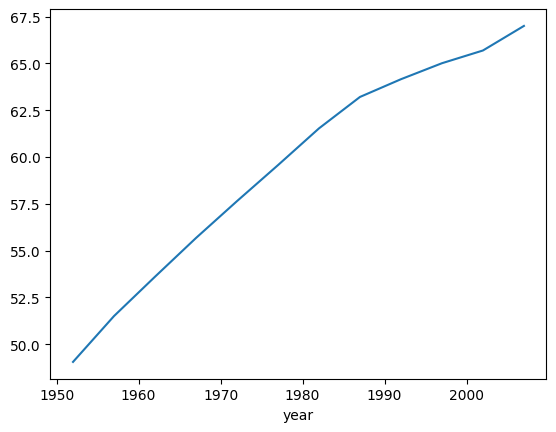

In [36]:
global_yearly_life_expectancy.plot()

In [37]:
#앤스콤 데이터 집합으로 그리기 
import seaborn as sns

anscombe = sns.load_dataset("anscombe")
anscombe

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


In [38]:
type(anscombe)

pandas.core.frame.DataFrame

In [39]:
%matplotlib notebook
import matplotlib.pyplot as plt

In [40]:
#anscombe데이터프레임의 dataset열에서 데이터 값이 I인 것만 추출함
#즉, 첫번째 데이터그룹을 추출한 것이다. 
dataset_1 = anscombe[anscombe["dataset"] == 'I']
plt.plot(dataset_1["x"], dataset_1["y"])

<IPython.core.display.Javascript object>

In [41]:
#plot메서드는 기본적으로 선으로 그래프를 그린다. 만약 점으로 그래프를 그리려면 o를 
#세번째 인자로 전달하면 된다. 
plt.plot(dataset_1["x"], dataset_1["y"], "o")

<IPython.core.display.Javascript object>

In [42]:
#앤스콤 데이터프레임의 dataset열의 값이 I,II,III,IV인 것을 불린 추출하여 저장한다.
dataset_2 = anscombe[anscombe["dataset"] == "II"]
dataset_3 = anscombe[anscombe["dataset"] == "III"]
dataset_4 = anscombe[anscombe["dataset"] == "IV"]

In [43]:
#먼저 그래프 격자가 위치할 기본 틀을 만든다.
fig = plt.figure()

<IPython.core.display.Javascript object>

In [44]:
#그래프 격자를 그린다. 2행 2열의 1번, 2번, 3번, 4번을 추가한다.
axes1 = fig.add_subplot(2,2,1)
axes2 = fig.add_subplot(2,2,2)
axes3 = fig.add_subplot(2,2,3)
axes4 = fig.add_subplot(2,2,4)


In [45]:
#이제 plot메서드에 데이터를 전달하여 그래프를 그린다. 
axes1.plot(dataset_1["x"], dataset_1["y"], "o")
axes2.plot(dataset_2["x"], dataset_2["y"], "o")
axes3.plot(dataset_3["x"], dataset_3["y"], "o")
axes4.plot(dataset_4["x"], dataset_4["y"], "o")



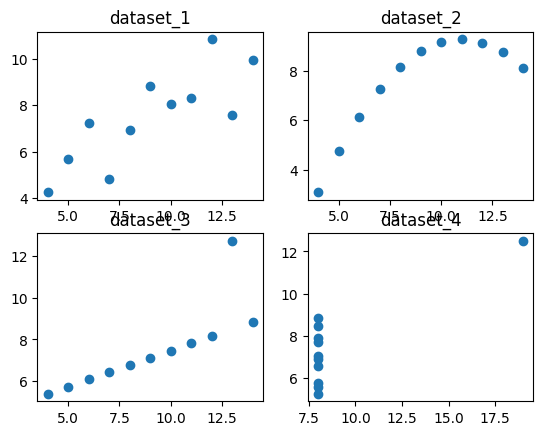

In [46]:
#각각의 그래프를 쉽게 구분할 수 있도록 제목을 추가합니다. 
axes1.set_title("dataset_1")
axes2.set_title("dataset_2")
axes3.set_title("dataset_3")
axes4.set_title("dataset_4")
#그래프를 확인하려면 fig를 입력하면 된다. 
fig


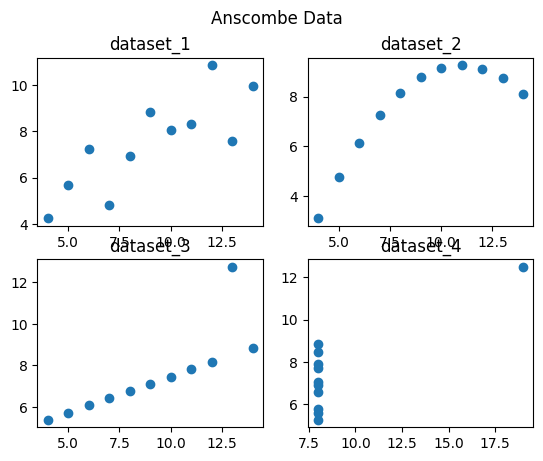

In [47]:
#기본 틀(fig)에도 제목을 추가해 봅니다. 
fig.suptitle("Anscombe Data")
fig

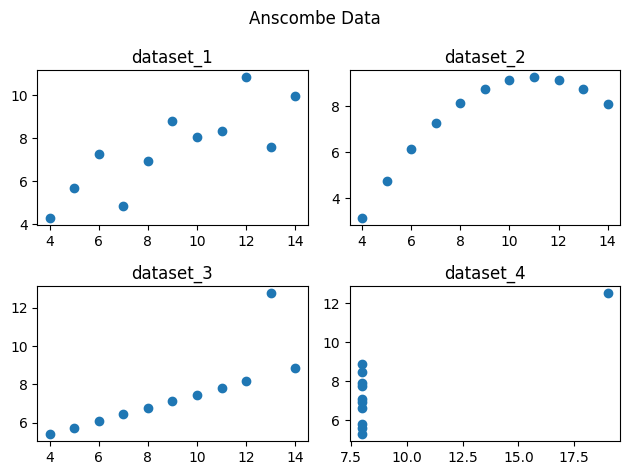

In [48]:
#그래프의 이름이 겹쳐보입니다. 이런 경우 tight_layout메서드를 호출하여 각 그래프의 
#레이아웃을 조절할 수 있습니다. 
fig.tight_layout()
fig

In [49]:
#tips데이터집합을 불러와 변수 tips에 저장한다. 
#tips는 지불금액, 팁, 성별, 흡연 유무, 시간, 전체 인원을 담고 있다.
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [50]:
#히스토그램은 데이터프레임의 열 데이터 분포와 빈도를 살펴보는 용도로 자주 사용한다. 
#이때 데이터프레임의 total_bill, tip등의 열을 변수라고 부르기도 한다.
#그리고 변수를 하나만 사용해서 그린 그래프를 "일변량 그래프"라고 한다. 
fig = plt.figure()
axes1 = fig.add_subplot(1,1,1)

<IPython.core.display.Javascript object>

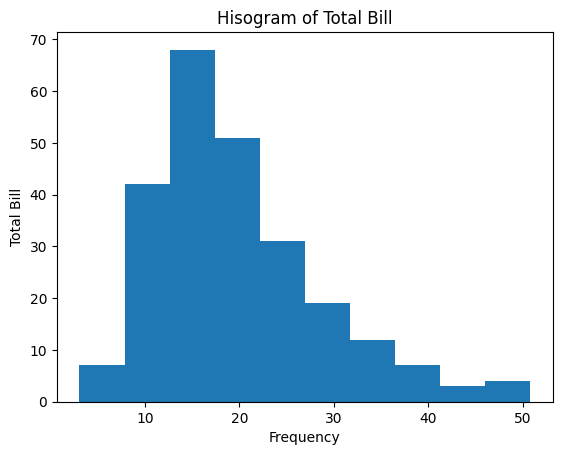

In [51]:
#hist메서드에 total_bill열을 전달하면 히스토그램이 만들어진다. 
#이때 x축의 간격은 bins인자값으로 조정할 수 있다. bins인자값을 10을 지정하면
#x축의 간격을 10으로 조정할 수 있다. 
#나머지는 그래프의 제목과 x,y축의 제목을 추가하는 코드이다. 
axes1.hist(tips["total_bill"], bins=10)
axes1.set_title("Hisogram of Total Bill")
axes1.set_xlabel("Frequency")
axes1.set_ylabel("Total Bill")
fig

<IPython.core.display.Javascript object>

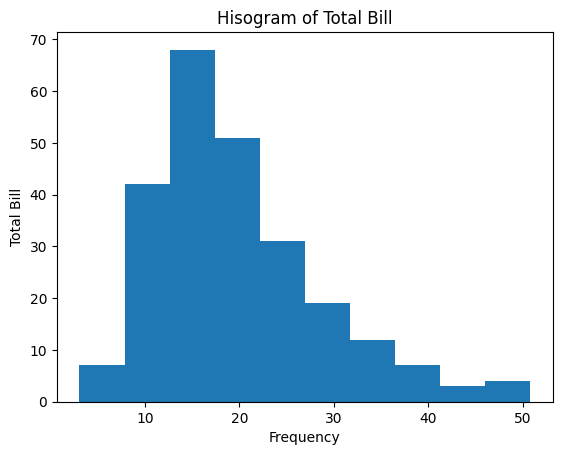

In [52]:
#이번에는 산점도 그래프를 그려본다. 
scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1,1,1)
axes1.scatter(tips["total_bill"], tips["tip"])
axes1.set_title("Scatterplot of Total Bill vs Tip")
axes1.set_xlabel("Total Bill")
axes1.set_ylabel("Tip")
fig

In [53]:
#박스그래프를 그려본다. 박스 그래프는 이산형 변수와 연속형 변수를 함께 사용하는
#그래프이다. 이산형 변수란 Female, Male과 같이 명확하게 구분되는 것을 의미하고,
#연속형 변수란 Tip과 같이 명확하게 셀 수 없는 범위의 값을 의미한다. 
#boxplot메서드를 사요하면 박스 그래프를 그릴 수 있다. 
#첫번째 인자는 tips데이터프레임에서 성별이 Female인 데이터와 Male인 데이터에서 tip열
#데이터만 추출하여 리스트에 담아 전달한 것이다. 
#두번째 인자는 labels인자값으로 성별을 구분하기 위한 이름을 추가한다. 
boxplot = plt.figure()
axes1 = boxplot.add_subplot(1,1,1)
axes1.boxplot([tips[tips["sex"] == "Female"]["tip"],
               tips[tips["sex"] == "Male"]["tip"]],
               labels=["Female","Male"])
axes1.set_xlabel("Female, Male")
axes1.set_ylabel("Tip")
axes1.set_title("Boxplot of Tips by Sex")


<IPython.core.display.Javascript object>

C:\Users\sofan\AppData\Local\Temp\ipykernel_1512\3764203866.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes1.boxplot([tips[tips["sex"] == "Female"]["tip"],


Text(0.5, 1.0, 'Boxplot of Tips by Sex')

In [55]:
#다변량 그래프 그리기 
#앞에서는 지불 금액(total_bill)과 팁(tip)만을 사용하여 산점도 그래프를 그렸다. 
#만약 여기에 성별을 추가하여 산점도 그래프를 표현하려면 어떻게 해야 할까? 점의 색상을
#다르게 하면 된다. 만약 식사 비용을 추가한다면 점의 크기를 다르게 하는 방법으로
#산점도 그래프를 표현할 수 있다. 
#이렇게 3개 이상의 변수를 사용하는 다변량 그래프는 적재적소에 맞는 그래프 요소를 
#추가하여 그래프를 표현하야 한다. 

#아래는 문자열을 0과 1로 변환하는 함수이다. 
def recode_sex(sex):
    if sex == "Female":
        return 0 
    else:
        return 1 
    
#이제 recode_sex메서드가 반환한 값을 데이터프레임에 추가하면 된다. 이때 sex열에 
#recode_sex함수를 브로드캐스팅하기 위하여 apply메서드를 사용했다.
tips["sex_color"] = tips["sex"].apply(recode_sex)

In [56]:
#그래프를 그리는 김에 테이블당 인원 수(size)도 산점도 그래프에 추가해 본다. 
#테이블당 인원 수는 점의 크기로 표현하면 적당하다. 
#다음은 scatter메서드에 s,c인자값으로 테이블당 인원 수와 성별의 치환값을 
#전달한 것이다. 
#s는 점의 크기(size)를, c는 점의 색상(color)를 의미한다.
#alpha인자값을 0.5로 지정하여 점의 투명도를 조절했다.
scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1,1,1)
axes1.scatter(
    x = tips["total_bill"],
    y = tips["tip"],
    s = tips["size"] * 10,
    c = tips["sex_color"],
    alpha = 0.5)
axes1.set_title("Total Bill vs Tip Colored by Sex and Sized by Size")
axes1.set_xlabel("Total Bill")
axes1.set_ylabel("TIp")

<IPython.core.display.Javascript object>

Text(0, 0.5, 'TIp')